# Exercise 3

In this exercise, you will analyse a dataset obtained from the London transport system (TfL). The data is in a filled called `tfl_readership.csv` (comma-separated-values format).  We will load and view the data using a package called `pandas`. 

In [ ]:
# If you are running this on Google Colab, uncomment and run the following lines; otherwise ignore this cell
# from google.colab import drive
# drive.mount('/content/drive')

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Load data
df_tfl = pd.read_csv('tfl_ridership.csv')
# If running on Google Colab change path to '/content/drive/MyDrive/IB-Data-Science/Exercises/tfl_ridership.csv'

df_tfl.head(13)

,Year,Period,Start,End,Days,Bus cash (000s),Bus Oyster PAYG (000s),Bus Contactless (000s),Bus One Day Bus Pass (000s),Bus Day Travelcard (000s),...,Tube Contactless (000s),Tube Day Travelcard (000s),Tube Season Travelcard (000s),Tube Other incl free (000s),Tube Total (000s),TfL Rail (000s),Overground (000s),DLR (000s),Tram (000s),Air Line (000s)
0,2000/01,P 01,01 Apr '00,29 Apr '00,29d,884,0,0,210,231,...,0,655,1066,200,2509,0,0,96,45.8,0.0
1,2000/01,P 02,30 Apr '00,27 May '00,28d,949,0,0,214,205,...,0,605,1168,217,2598,0,0,93,46.5,0.0
2,2000/01,P 03,28 May '00,24 Jun '00,28d,945,0,0,209,221,...,0,650,1154,212,2623,0,0,98,47.1,0.0
3,2000/01,P 04,25 Jun '00,22 Jul '00,28d,981,0,0,216,241,...,0,708,1196,214,2761,0,0,105,50.8,0.0
4,2000/01,P 05,23 Jul '00,19 Aug '00,28d,958,0,0,225,248,...,0,730,1165,165,2643,0,0,103,50.3,0.0
5,2000/01,P 06,20 Aug '00,16 Sep '00,28d,984,0,0,243,236,...,0,702,1164,151,2608,0,0,100,49.2,0.0
6,2000/01,P 07,17 Sep '00,14 Oct '00,28d,1001,0,0,205,216,...,0,639,1286,196,2763,0,0,107,48.8,0.0
7,2000/01,P 08,15 Oct '00,11 Nov '00,28d,979,0,0,199,221,...,0,668,1298,220,2819,0,0,113,51.5,0.0
8,2000/01,P 09,12 Nov '00,09 Dec '00,28d,971,0,0,184,212,...,0,640,1302,242,2839,0,0,114,54.0,0.0
9,2000/01,P 10,10 Dec '00,06 Jan '01,28d,912,0,0,192,211,...,0,631,993,195,2359,0,0,90,55.3,0.0


Each row of our data frame represents the average daily ridership over a 28/29 day period for various types of transport and tickets (bus, tube etc.).  We have used the `.head()` command to display the top 13 rows of the data frame (corresponding to one year).  Focusing on the "Tube Total" column, notice the dip in ridership in row 9 (presumably due to Christmas/New Year's), and also the slight dip during the summer (rows 4,5).

In [3]:
#df_tfl.sample(3)  #random sample of 3 rows
df_tfl.tail(3)  #last 3 rows

,Year,Period,Start,End,Days,Bus cash (000s),Bus Oyster PAYG (000s),Bus Contactless (000s),Bus One Day Bus Pass (000s),Bus Day Travelcard (000s),...,Tube Contactless (000s),Tube Day Travelcard (000s),Tube Season Travelcard (000s),Tube Other incl free (000s),Tube Total (000s),TfL Rail (000s),Overground (000s),DLR (000s),Tram (000s),Air Line (000s)
242,2018/19,P 09,11 Nov '18,08 Dec '18,28d,0,1110,1089,0,41,...,1399,249,1017,334,4221,996,557,355,84.1,2.6
243,2018/19,P 10,09 Dec '18,05 Jan '19,28d,0,1001,949,0,38,...,1110,242,632,259,3279,750,414,270,66.3,3.2
244,2018/19,P 11,06 Jan '19,02 Feb '19,28d,0,1036,1075,0,30,...,1310,204,924,305,3809,929,517,333,79.3,2.3


The dataframe contains $N=245$ counting periods (of 28/29 days each) from 1 April 2000 to  2 Feb 2019. We now define a numpy array consisting of the values in the ' Tube Total (000s)' column:

In [5]:
yvals = np.array(df_tfl['Tube Total (000s)'])
N = np.size(yvals)
xvals = np.linspace(1,N,N) #an array containing the values 1,2....,N

We now have a time series consisting of points $(x_i,y_i)$, for $i = 1, \ldots, N$, where $y_i$ is the average daily tube rideship in counting period $x_i = i$.

## 2a) Plot the data in a scatterplot

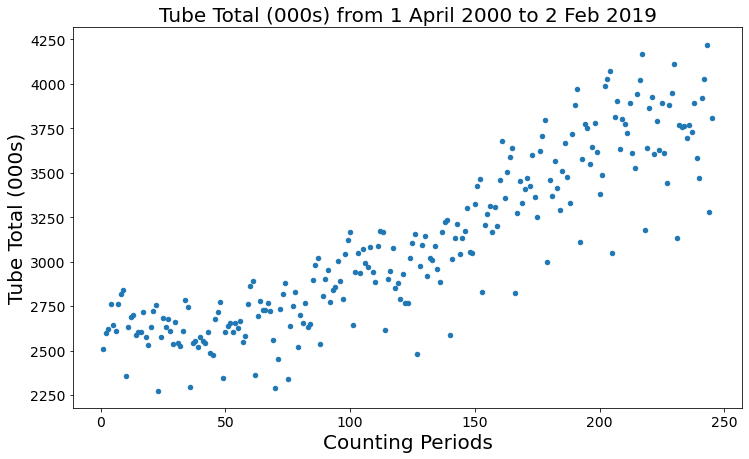

In [6]:
#Your code for scatterplot here
# Set parameters to make sure figures are large enough. You can try changing these values
plt.rcParams['figure.figsize'] = [12, 7]
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

plt.scatter(xvals, yvals, s=20)   # s can be used to adjust the size of the dots
plt.xlabel('Counting Periods')
plt.ylabel('Tube Total (000s)')
plt.title('Tube Total (000s) from 1 April 2000 to 2 Feb 2019')

plt.show()


## 2b) Fit a linear model $f(x) = \beta_0 + \beta_1 x$ to the data

- Print the values of the regression coefficients $\beta_0, \beta_1$ determined using least-squares. 
- Plot the fitted model and the scatterplot on the same plot.
- Compute and print the **MSE** and the $R^2$ coefficient for the fitted model.

All numerical outputs should be displayed to three decimal places.

The dimensions of X are (245, 2)
Regression coefficients: beta_0 = 2367.382 	 beta_1 =  5.939


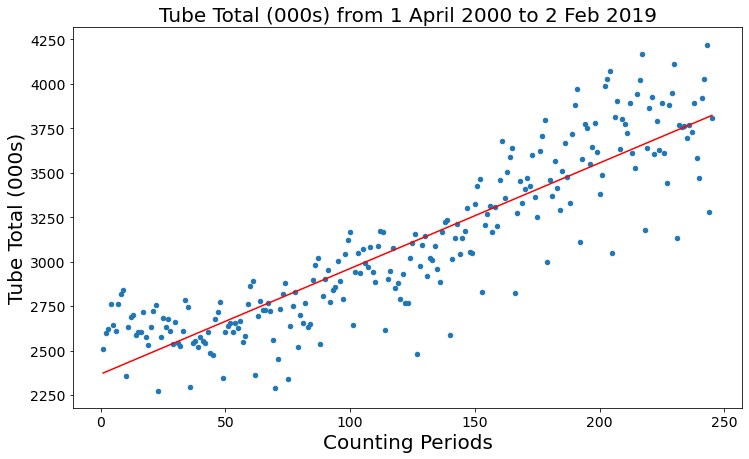

SSE_0 =  54329288.33  	 MSE_0 =  221752.2
SSE_1 =  11104290.8  	 MSE_1 =  45323.64
R^2 for the first-order linear model =  0.7956


In [13]:
#Your code here
all_ones = np.ones(np.shape(xvals))

# Create matrix X which contains all ones in first column, and dates in the second
X  = np.column_stack((all_ones, xvals))
print('The dimensions of X are',np.shape(X))

XT = X.T  # transpose
beta_lin = np.linalg.inv(XT.dot(X)).dot(XT.dot(yvals))   

print('Regression coefficients: beta_0 =', np.round(beta_lin[0], decimals =3), 
      '\t beta_1 = ', np.round(beta_lin[1], decimals =3)) 

# Computing the fit of the model
fit_lin = X.dot(beta_lin)
fit_0 = np.mean(yvals)*all_ones 

plt.rcParams['figure.figsize'] = [12, 7]
plt.scatter(xvals, yvals, s=20)   # s can be used to adjust the size of the dots

plt.plot(xvals, fit_lin, color = 'red')

plt.xlabel('Counting Periods')
plt.ylabel('Tube Total (000s)')
plt.title('Tube Total (000s) from 1 April 2000 to 2 Feb 2019')

plt.show()

#We now compute the sum of squared errors and the MSE
SSE_0 = np.linalg.norm(yvals - fit_0)**2
MSE_0 = SSE_0/(np.size(yvals))
SSE_1 = np.linalg.norm(yvals - fit_lin)**2
MSE_1 = SSE_1/(np.size(yvals))

print('SSE_0 = ', np.round_(SSE_0, 2), ' \t MSE_0 = ', np.round_(MSE_0, 2))  
print('SSE_1 = ', np.round_(SSE_1, 2), ' \t MSE_1 = ', np.round_(MSE_1, 2) )
print('R^2 for the first-order linear model = ', np.round(1- SSE_1/SSE_0, decimals = 4))

## 2c)  Plotting the residuals

- Plot the residuals on a scatterplot
- Also plot the residuals over a short duration and comment on whether you can discern any periodic components.

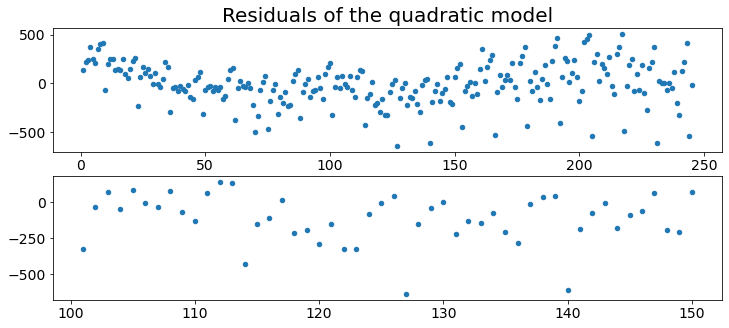

In [18]:
# Your code here
#Compute the residuals
resid_lin = yvals - fit_lin

plt.rcParams['figure.figsize'] = [12, 5]
plt.subplot(211)
plt.scatter(xvals, resid_lin, s=20)
plt.title('Residuals of the quadratic model')
plt.subplot(212)
plt.scatter(xvals[100:150], resid_lin[100:150], s=20) 

Large U shape for every 100 periods (peak at period=0,100,200) and small periodic variation for each 10 periods.

## 2d) Periodogram

- Compute and plot the peridogram of the residuals. (Recall that the periodogram is the squared-magnitude of the DFT coefficients.)
- Identify the indices/frequencies for which the periogram value exceeds **50%** of the maximum. 


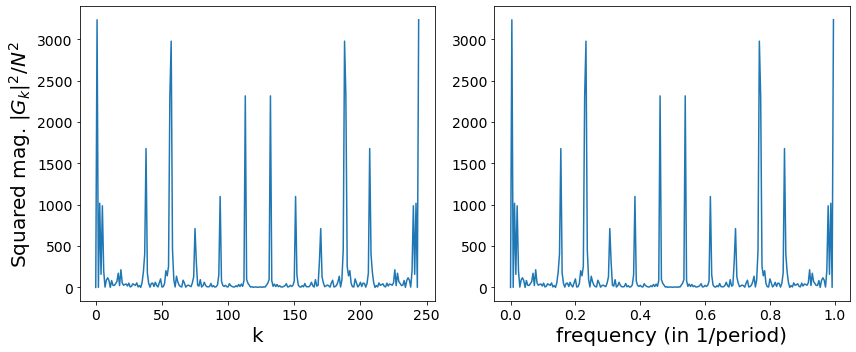

In [19]:
# Your code to compute and plot the histogram
N = np.size(xvals)
T = xvals[101] - xvals[100]  # This can be the time interval between any two successive values.

# Compute the squared magnitudes of the DFT coefficients -- this is known as the "periodogram"
pgram = np.abs(np.fft.fft(resid_lin, N)/N)**2 #We normalize by N, but this is optional
indices = np.linspace(0, (N-1), num = N)
freqs_in_hz = indices/(N*T)
freqs_in_rads = freqs_in_hz*2*math.pi

plt.subplot(121)
plt.plot(indices, pgram)
plt.xlabel('k')
plt.ylabel('Squared mag. $|G_k|^2/N^2$')
plt.subplot(122)
plt.plot(freqs_in_hz, pgram)
plt.xlabel('frequency (in 1/period)')  # Since units of T is years

plt.tight_layout()



In [20]:
# Your code to identify the indices for which the periodogram value exceeds 50% of the maximum
top_inds = indices[(pgram > 0.5*np.max(pgram))]
top_freqs_hz = freqs_in_hz[(pgram > 0.5*np.max(pgram))]
print('Top indices:', top_inds, ' Top frequencies in Hz:', top_freqs_hz)


Top indices: [  1.  38.  56.  57. 113. 132. 188. 189. 207. 244.]  Top frequencies in Hz: [0.00408163 0.15510204 0.22857143 0.23265306 0.46122449 0.53877551
 0.76734694 0.77142857 0.84489796 0.99591837]


## 2e) To the residuals,  fit a model of the form  

$$ \beta_{1s} \sin(\omega_1 x) + \beta_{1c} \cos(\omega_1 x) + \beta_{2s} \sin(\omega_2 x) + \beta_{2c} \cos(\omega_2 x) + \ldots + \beta_{Ks} \sin(\omega_K x) + \beta_{Kc} \cos(\omega_K x).$$

The frequencies $\omega_1, \ldots, \omega_K$ in the model are those corresponding to the indices identified in Part 2c. (Hint: Each of the sines and cosines will correspond to one column in your X-matrix.)

- Print the values of the regression coefficients obtained using least-squares. 
- Compute and print the final **MSE** and $R^2$ coefficient. Comment on the improvement over the linear fit.

All numerical outputs should be displayed to three decimal places.

The coefficients beta_s, beta_c are: [-51.253 101.556  61.628 -54.006 -15.581 -94.797  81.659  72.381  32.472
  90.589]


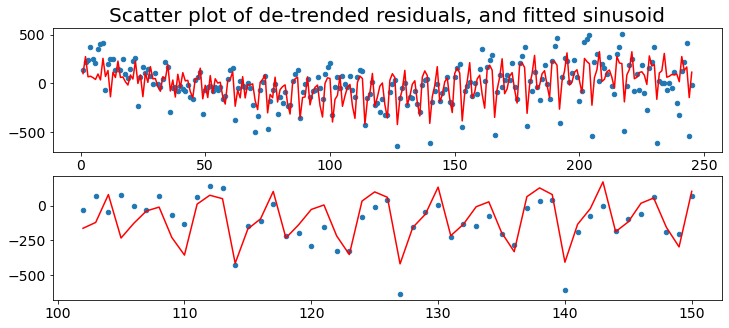

Mean of final residuals: -0.0
Sum of squared errors SSE for linear + sinusoid model is: 4972887.791
Mean squared error MSE for linear + sinusoid model is: 20297.501
R^2 final =  0.908


In [31]:
# Your code here

w = 2*math.pi*top_inds/(N*T)  # Freq. in rad/s corresponding to k* is w = 2.pi.k*/(NT)

# Now form the X matrix with columns sin(wx) and cos(wx) for x in dates. First define its transpose
XT = np.vstack((np.sin(w[0]*xvals), np.cos(w[0]*xvals),np.sin(w[1]*xvals), np.cos(w[1]*xvals),np.sin(w[2]*xvals), np.cos(w[2]*xvals),np.sin(w[3]*xvals), np.cos(w[3]*xvals),np.sin(w[4]*xvals), np.cos(w[4]*xvals)))
X = np.transpose(XT)

beta_sc = np.linalg.inv(XT.dot(X)).dot(XT).dot(resid_lin) # Calculating the least-squares coefficients
print('The coefficients beta_s, beta_c are:', np.round(beta_sc, decimals=3))
fit_sc = X.dot(beta_sc)

plt.subplot(211)
plt.scatter(xvals, resid_lin, s=20)
plt.plot(xvals, fit_sc, 'r')
plt.title('Scatter plot of de-trended residuals, and fitted sinusoid')
# Zoom in to a few values
plt.subplot(212)
plt.scatter(xvals[101:150], resid_lin[101:150], s=20)
plt.plot(xvals[101:150], fit_sc[101:150], 'r')

plt.show()

resid_final = resid_lin - fit_sc
SSE_final = np.linalg.norm(resid_final)**2
MSE_final = SSE_final/np.size(yvals)
print('Mean of final residuals:', np.round(np.mean(resid_final), 3))
print('Sum of squared errors SSE for linear + sinusoid model is:', np.round(SSE_final, 3)) 
print('Mean squared error MSE for linear + sinusoid model is:',  np.round(MSE_final,3))
print('R^2 final = ', np.round(1- SSE_final/SSE_0, decimals = 3))

## 2f) The combined fit
- Plot the combined fit together with a scatterplot of the data
- Compute and print the final **MSE** and $R^2$ coefficient. Comment on the improvement over the linear fit.

The combined fit, which corresponds to the full model

$$
f(x) = \beta_0 + \beta_1 x + \beta_{s1} \sin(\omega_1 x) + \beta_{c1} \cos(\omega_1 x) + \ldots + \beta_{sk} \sin(\omega_k x) + \beta_{ck} \cos(\omega_k x),
$$

can be obtained by adding the fits in parts 2b) and 2e).

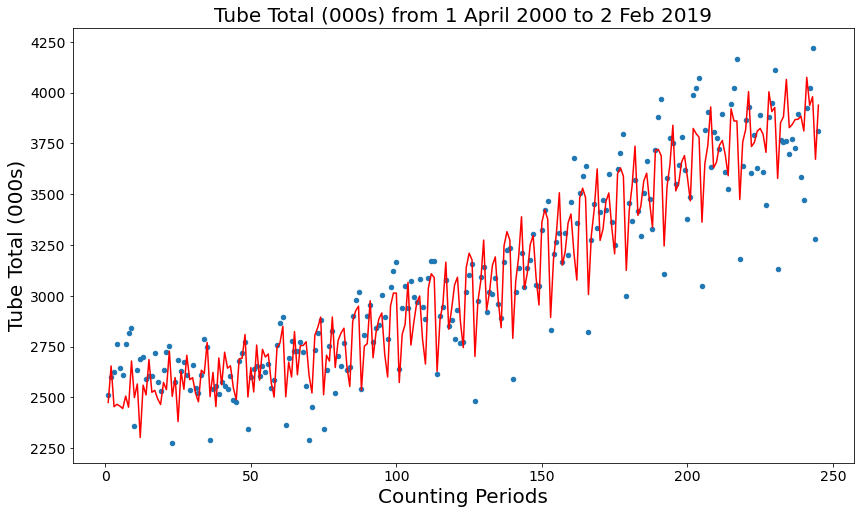

Sum of squared errors for the combined fit =  4972887.791
Mean squared error for the combined fit =  20297.501
R^2 coefficient of combined fit =  0.908


In [32]:
# Your code here
fit_combined = fit_lin + fit_sc
resid_comb = yvals - fit_combined

plt.rcParams['figure.figsize'] = [14, 8]
plt.scatter(xvals, yvals, s=20)   # s can be used to adjust the size of the dots
plt.plot(xvals, fit_combined, 'r')
plt.xlabel('Counting Periods')
plt.ylabel('Tube Total (000s)')
plt.title('Tube Total (000s) from 1 April 2000 to 2 Feb 2019')
plt.show()

SSE_combined = np.linalg.norm(resid_comb)**2
MSE_combined = SSE_combined/np.size(yvals)
print('Sum of squared errors for the combined fit = ', np.round(SSE_combined,3))
print('Mean squared error for the combined fit = ', np.round(MSE_combined,3))

SSE_0 = np.linalg.norm(yvals - np.mean(yvals))**2
R2_combined = 1 - SSE_combined/SSE_0
print('R^2 coefficient of combined fit = ', np.round(R2_combined, 3))


Smaller SSE, MSE and lager R^2 for the fit,, i.e. better fit.